# PageRank (Project C)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(500, 500)

In [15]:
def m_to_g(M, alpha):
    """
    Convert a matrix M to a Google matrix G.
    """
    n = M.shape[0]
    A = np.zeros((n, n))
    for i in range(n):
        if M[i].sum() == 0:
            A[i] = np.ones(n) / n
        else:
            A[i] = M[i] / M[i].sum()
    G = alpha * A + (1 - alpha) / n * np.ones((n, n))
    return G

def plot_eigenvalues(eigenvalues):
    """
    Plot the eigenvalues of all 3 Google matrices and draw circles with radius alpha.
    """

    alphas = [0.85, 0.5, 0.25]
    colors = ['blue', 'orange', 'green'] 

    plt.figure(figsize=(10, 10))
    ax = plt.gca()

    for i, eig in enumerate(eigenvalues):
        plt.scatter(np.real(eig), np.imag(eig), label=f'α = {alphas[i]}', s=10, color=colors[i])
        
        circle = plt.Circle((0, 0), radius=alphas[i], color=colors[i], fill=False, linestyle='--')
        ax.add_patch(circle)

    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    
    plt.axis('equal') 
    
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Eigenvalues of Google Matrices with Alpha Circles')
    plt.legend()
    plt.grid()
    plt.show()

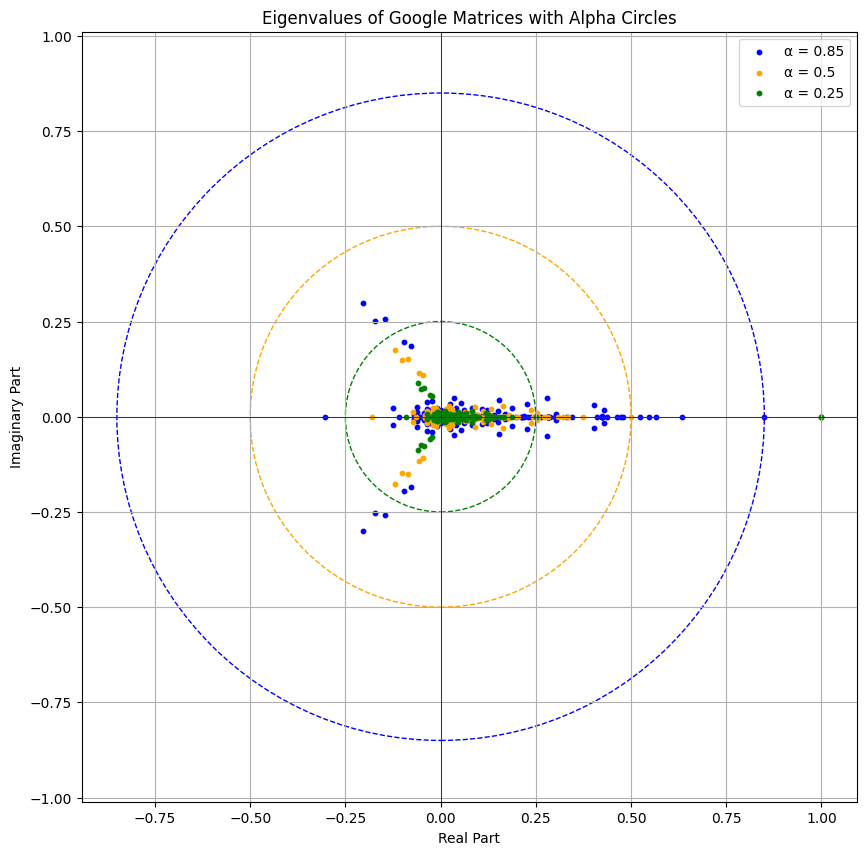

In [16]:
M = np.asarray(pd.read_csv('google.csv', header=None))

G = []

G.append(m_to_g(M, 0.85))
G.append(m_to_g(M, 0.5))
G.append(m_to_g(M, 0.25))

eig_G = []
eigv_G = []

for g in G:
    eig, eigv = np.linalg.eig(g)
    eig_G.append(eig)
    eigv_G.append(eigv)

plot_eigenvalues(eig_G)

In [ ]:
# Sort the eigenvalues and eigenvectors
for i in range(len(eig_G)):
    idx = np.argsort(np.abs(eig_G[i]))
    eig_G[i] = eig_G[i][idx]
    eigv_G[i] = eigv_G[i][:, idx]